In [12]:
#bu notebook u da udemydeki hoca nasıl yaptıysa ondan bakarak yazacağım. çok büyük farklılıkklar yok zaten. okuma ve ön işlemler
#farklı sadece. bunu da yapmış olayım. burada dataseti indirip csv halinde bulunması gerekiyor. kaggle'dan indirdim "digit-recognizer"
#diye yarışma var oradan indirebiliriz.


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical   #one-hot için gerekli
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [14]:
# load and preprocess
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes=len(set(y)))

    return x,y

In [15]:
train_data_path = "./mnist_train.csv"
test_data_path = "./mnist_test.csv"

x_train,y_train = load_and_preprocess(train_data_path)
x_test, y_test = load_and_preprocess(test_data_path)

No handles with labels found to put in legend.


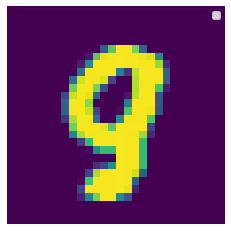

9


In [16]:
# %% visualize
index = 55
vis = x_train.reshape(60000,28,28)
plt.imshow(vis[index,:,:]) 
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

In [21]:

#%% CNN
numberOfClass = y_train.shape[1]

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [23]:
# Train
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs= 20, batch_size= 128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0761 - accuracy: 0.9771 - val_loss: 0.0990 - val_accuracy: 0.9680
Epoch 2/20
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 3/20
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0239 - accuracy: 0.9919 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 4/20
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 5/20
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0375 - val_accuracy: 0.9884
Epoch 6/20
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0318 - val_accuracy: 0.9908
Epoch 7/20
60000/60000 [==============================] - 135s

In [24]:
#%%
#model.save_weights('cnn_mnist_model.h5')  # always save your weights after training or during training
model.save('model.h5')  # always save your weights after training or during training

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


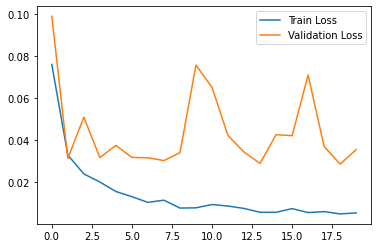

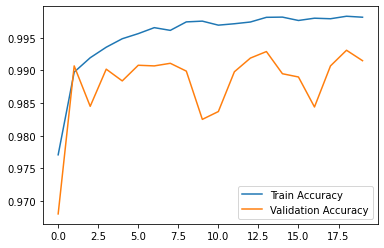

In [25]:
#%% evaluation 
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()

In [33]:
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.models import load_model

img_path = "./7.png"
img = load_img(img_path , grayscale=True, target_size = (28,28))
img.show()

img_array = img_to_array(img)
img_array = np.reshape(img_array,[1,28,28,1])

classNumber = np.argmax(model.predict(img_array), axis = -1)
classes = model.predict(img_array)
print(classes)
print(classNumber)
class_names = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9'] # fill the rest
digit = [class_names[i] for i in classNumber]

print(digit)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[7]
['7']
